# 기상 데이터 시각화

In [29]:
# 필요 패키지 로딩

import pandas as pd
import matplotlib.pyplot as plt
import platform
import seaborn as sns

from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False


if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

## 1. 데이터 확인

In [30]:
# 2016년 기상 데이터 확인

df_weather_2016 = pd.read_csv('../../lawdata/weather/기상관측2016real_Fixed.csv', 
                              encoding = 'cp949',
                              index_col='기상번호')

print(df_weather_2016.info())
print(df_weather_2016.head())
# parse_dates = ['일시'] # 컬럼 데이트 타입으로 변환하는 함수.(여기선 사용 X)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6222 entries, 1120160101 to 4920161231
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시도코드          6222 non-null   int64  
 1   일시            6222 non-null   int64  
 2   평균기온(°C)      6222 non-null   float64
 3   최저기온(°C)      6222 non-null   float64
 4   최고기온(°C)      6222 non-null   float64
 5   강수 계속시간(hr)   6222 non-null   float64
 6   일강수량(mm)      6222 non-null   float64
 7   평균 풍속(m/s)    6222 non-null   float64
 8   평균 현지기압(hPa)  6221 non-null   float64
 9   일 최심신적설(cm)   6222 non-null   float64
 10  최다풍향(16방위)    6222 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 583.3 KB
None
            시도코드        일시  평균기온(°C)  최저기온(°C)  최고기온(°C)  강수 계속시간(hr)  \
기상번호                                                                    
1120160101    11  20160101       1.2      -3.3       4.0          0.0   
1120160102    11  20160102       5.7       

In [31]:
# 2017년 기상 데이터 확인

df_weather_2017 = pd.read_csv('../../lawdata/weather/기상관측2017real_Fixed.csv', 
                              encoding = 'cp949',
                              index_col='기상번호')

print(df_weather_2017.info())
print(df_weather_2017.head())
# parse_dates = ['일시'] # 컬럼 데이트 타입으로 변환하는 함수.(여기선 사용 X)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6202 entries, 1120170101 to 4920171231
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시도코드          6202 non-null   int64  
 1   일시            6202 non-null   int64  
 2   평균기온(°C)      6201 non-null   float64
 3   최저기온(°C)      6202 non-null   float64
 4   최고기온(°C)      6201 non-null   float64
 5   강수 계속시간(hr)   6202 non-null   float64
 6   일강수량(mm)      6202 non-null   float64
 7   평균 풍속(m/s)    6202 non-null   float64
 8   평균 현지기압(hPa)  6202 non-null   float64
 9   일 최심신적설(cm)   6202 non-null   float64
 10  최다풍향(16방위)    6202 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 581.4 KB
None
            시도코드        일시  평균기온(°C)  최저기온(°C)  최고기온(°C)  강수 계속시간(hr)  \
기상번호                                                                    
1120170101    11  20170101       2.7      -1.6       6.9         0.00   
1120170102    11  20170102       5.0       

In [32]:
# 2018년 기상 데이터 확인

df_weather_2018 = pd.read_csv('../../lawdata/weather/기상관측2018real_Fixed.csv', 
                              encoding = 'cp949',
                              index_col='기상번호')

print(df_weather_2018.info())
print(df_weather_2018.head())
# parse_dates = ['일시'] # 컬럼 데이트 타입으로 변환하는 함수.(여기선 사용 X)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6205 entries, 1120180101 to 4920181231
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시도코드          6205 non-null   int64  
 1   일시            6205 non-null   int64  
 2   평균기온(°C)      6205 non-null   float64
 3   최저기온(°C)      6205 non-null   float64
 4   최고기온(°C)      6205 non-null   float64
 5   강수 계속시간(hr)   6205 non-null   float64
 6   일강수량(mm)      6205 non-null   float64
 7   평균 풍속(m/s)    6205 non-null   float64
 8   평균 현지기압(hPa)  6205 non-null   float64
 9   일 최심신적설(cm)   6205 non-null   float64
 10  최다풍향(16방위)    6205 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 581.7 KB
None
            시도코드        일시  평균기온(°C)  최저기온(°C)  최고기온(°C)  강수 계속시간(hr)  \
기상번호                                                                    
1120180101    11  20180101      -1.3      -5.1       3.8          0.0   
1120180102    11  20180102      -1.8      -

## 2. 연도별 월 평균 기온 시각화

In [33]:
# 2016~2018년 데이터 결합
df_combine_161718 = pd.concat([df_weather_2016, df_weather_2017, df_weather_2018])

# 타입 변환 후 월, 연도를 나타내는 컬럼 생성
df_combine_161718['일시'] = df_combine_161718['일시'].astype('str')
df_combine_161718['월별'] = df_combine_161718['일시'].apply(lambda x:x[4:6])
df_combine_161718['연도'] = df_combine_161718['일시'].apply(lambda x:x[0:4])

# 데이터 확인
df_combine_161718.head(50)

,시도코드,일시,평균기온(°C),최저기온(°C),최고기온(°C),강수 계속시간(hr),일강수량(mm),평균 풍속(m/s),평균 현지기압(hPa),일 최심신적설(cm),최다풍향(16방위),월별,연도
기상번호,,,,,,,,,,,,,
1120160101,11,20160101,1.2,-3.3,4.0,0.00,0.0,1.6,1019.9,0.0,90.0,01,2016
1120160102,11,20160102,5.7,1.0,9.5,0.00,0.0,2.0,1012.0,0.0,320.0,01,2016
1120160103,11,20160103,6.5,5.1,9.4,0.00,0.0,1.8,1008.9,0.0,320.0,01,2016
1120160104,11,20160104,2.0,-2.5,5.3,0.00,0.0,3.1,1013.1,0.0,320.0,01,2016
1120160105,11,20160105,-2.7,-4.8,1.5,0.00,0.0,2.3,1016.9,0.0,20.0,01,2016
1120160106,11,20160106,-1.7,-4.9,1.7,0.00,0.0,1.8,1014.7,0.0,320.0,01,2016
1120160107,11,20160107,-3.4,-5.9,1.4,0.00,0.0,2.5,1013.9,0.0,20.0,01,2016
1120160108,11,20160108,-3.3,-6.9,1.0,0.00,0.0,2.0,1012.6,0.0,290.0,01,2016
1120160109,11,20160109,-2.1,-6.2,2.4,0.00,0.0,2.1,1014.3,0.0,360.0,01,2016


연도       2016       2017       2018
월별                                 
01  -0.500019   0.520351  -1.634203
02   2.179097   1.970535   0.257805
03   7.563744   6.686525   8.411408
04  14.038069  14.012046  13.494100
05  18.792989  18.854449  17.982309
06  22.420969  21.997123  22.269094
07  25.601811  26.593714  26.943271
08  26.954703  25.737768  27.570373
09  21.971462  21.058388  20.839825
10  16.219785  15.807607  13.531324
11   8.277639   7.281066   8.699609
12   3.538711   0.337098   1.676292


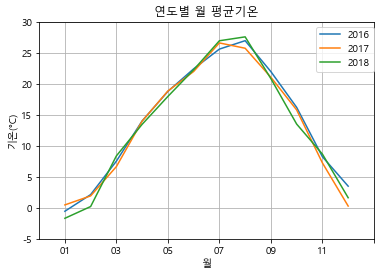

In [34]:
# 결합 데이터로 연도별 월 평균기온 시각화

df_pivot = df_combine_161718.pivot_table(values='평균기온(°C)', columns = '연도' , index='월별') 

print(df_pivot)
df_pivot.plot()

plt.legend(bbox_to_anchor=(0.515, 0.3, 0.5, 0.7))
plt.axis([-1, 12, -5, 30])
plt.grid(True)

plt.xlabel('월')
plt.ylabel('기온(°C)')
plt.title('연도별 월 평균기온')

# 사진 파일 저장
plt.savefig('연도별 월 평균기온', dpi = 700)

연도      2016       2017      2018
월별                               
01  0.959058   0.510275  0.819745
02  1.687965   1.166501  1.282459
03  2.007064   0.761375  3.504755
04  5.092086   2.439246  4.610443
05  3.472019   0.955979  4.272491
06  2.504647   1.819186  5.073318
07  9.352855  10.112015  5.456605
08  2.570637   7.471407  9.382872
09  6.575182   3.466004  5.083704
10  5.167158   2.183077  4.771028
11  1.108101   0.434370  1.753845
12  2.069032   0.772309  1.041576


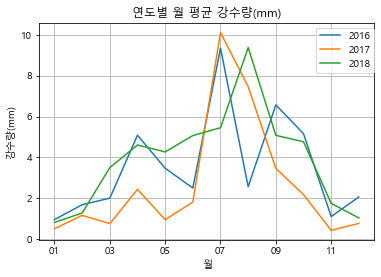

In [35]:
# 결합 데이터로 연도별 월 평균 강수량 시각화

df_pivot2 = df_combine_161718.pivot_table(values='일강수량(mm)', columns = '연도' , index='월별') 

print(df_pivot2)
df_pivot2.plot()

plt.legend(bbox_to_anchor=(0.515, 0.3, 0.5, 0.7))

plt.grid(True)
plt.xlabel('월')
plt.ylabel('강수량(mm)')
plt.title('연도별 월 평균 강수량(mm)')

# 사진 파일 저장
plt.savefig('연도별 월 평균 강수량(mm)', dpi = 700)

## 3. 연도별 기상요인(평균기온, 일강수량)과 호흡기질환 발생 관계 시각화

### 3.1 연도별 기상요인(평균기온)과 호흡기질환 발생 관계 시각화

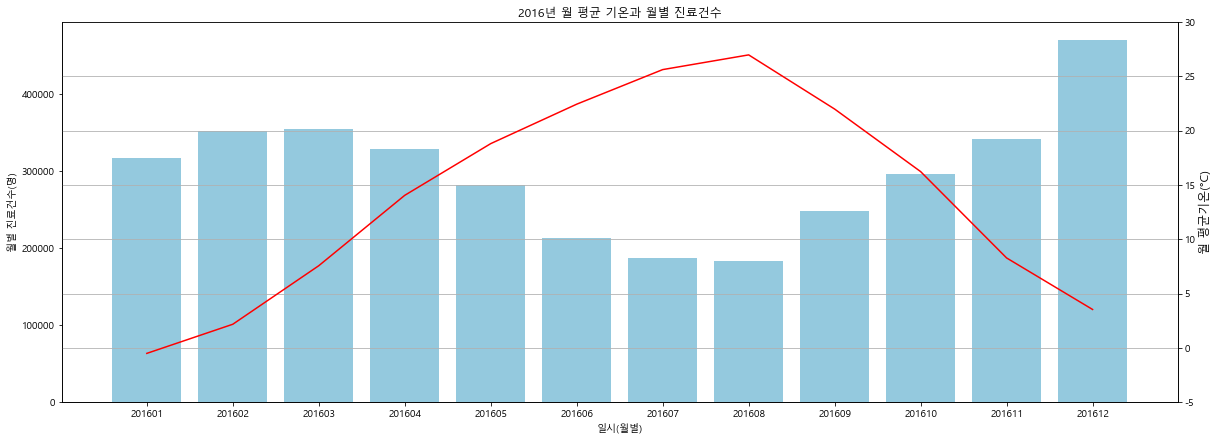

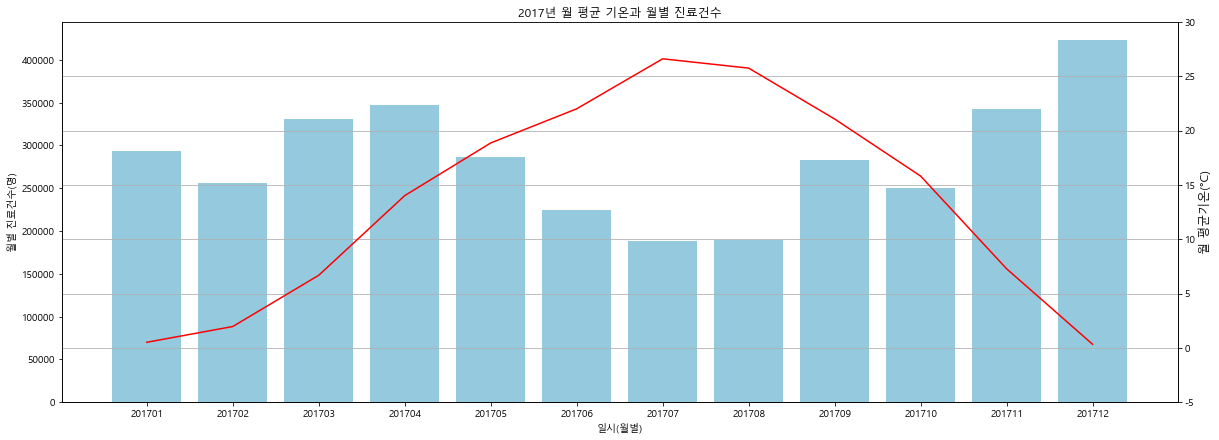

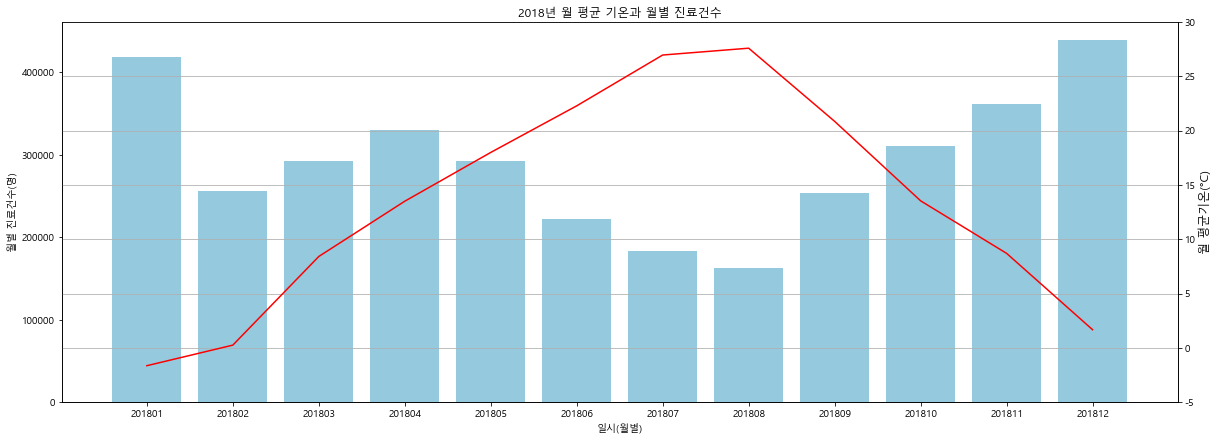

In [36]:
for i in [2016,2017,2018]:
    
    # 기상 데이터 로딩
    df_weather = pd.read_csv(f'../../lawdata/weather/기상관측{i}real_Fixed.csv', encoding = 'cp949')
    
    # 진료 데이터 로딩 (상세내용은 진료내역 전처리 참고)
    if i in [2016]:
        df_medi = pd.read_csv(f'../../lawdata/medical/NHIS_{i}_J_Cases.csv', encoding = 'cp949')
    else :
        df_medi = pd.read_csv(f'../../lawdata/medical/NHIS_{i}_J_Cases.csv', encoding = 'UTF-8')
        pass
    
    # 컬럼 타입 변환 후 일시 컬럼 재생성
    df_medi['요양개시일자'] =df_medi['요양개시일자'].astype('str')
    df_medi['일시(월별)'] = df_medi['요양개시일자'].apply(lambda x:x[:6])
    df_medi_count = df_medi.groupby('일시(월별)').count()['주상병코드']
    
    # 컬럼 타입 변환 후 일시 컬럼 재생성
    df_weather['일시'] =df_weather['일시'].astype('str')
    df_weather['일시(월별)'] = df_weather['일시'].apply(lambda x:x[:6])
    df_weather_mean = df_weather.groupby('일시(월별)')['평균기온(°C)'].mean()
    df_medi_count
    
    # 데이터 시각화
    f, ax = plt.subplots(figsize = (20, 7))
    
    # 진료 건수를 막대그래프로 그리기
    ax =sns.barplot(x = df_medi_count.index,
                     y = '주상병코드',
                    data = df_medi_count.to_frame(),
                   color = 'skyblue')
    
    ax2 = ax.twinx()
    
    # 평균 기온을 선그래프로 그리기
    ax2 = sns.lineplot(x = df_weather_mean.index,
                      y = '평균기온(°C)',
                      data = df_weather_mean.to_frame(),
                      color = 'red')

#     ax1.set_ylim(0, 50000)
    ax2.set_ylim(-5, 30)
#     ax1.set_xlabel(f'{i}', size = 10)
    ax.set_ylabel('월별 진료건수(명)', size = 10)
    ax2.set_ylabel('월 평균기온(°C)', size = 10)
    plt.grid(True)
#     plt.axis([1950, 2010, 30, 90])
    plt.title(f'{i}년 월 평균 기온과 월별 진료건수')
    plt.ylabel('월 평균기온(°C)', fontsize=12)
    
    # 사진 파일 저장
    plt.savefig(f'{i}년 월 평균 기온과 월별 진료건수', dpi = 700)
    plt.show()
    pass

### 3.2 연도별 기상요인(강수량)과 호흡기질환 발생 관계 시각화

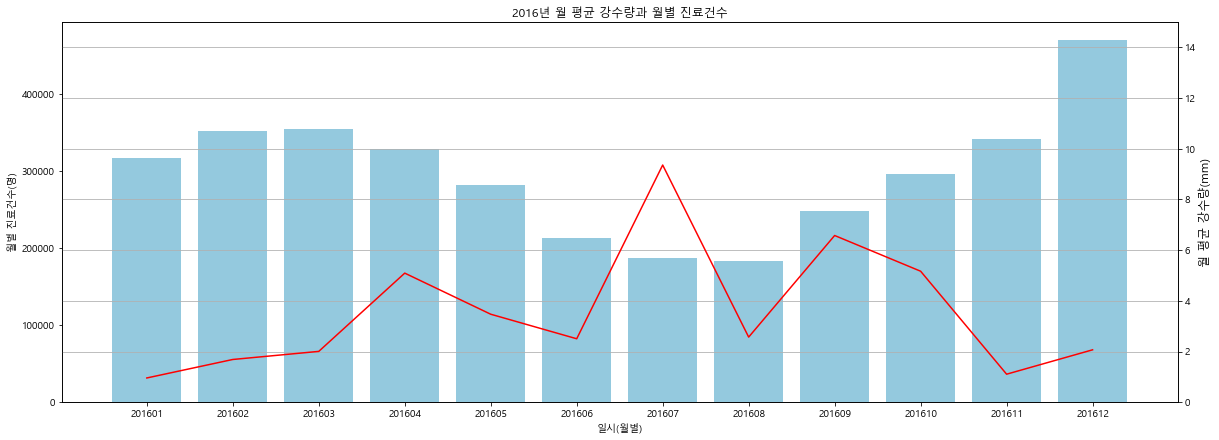

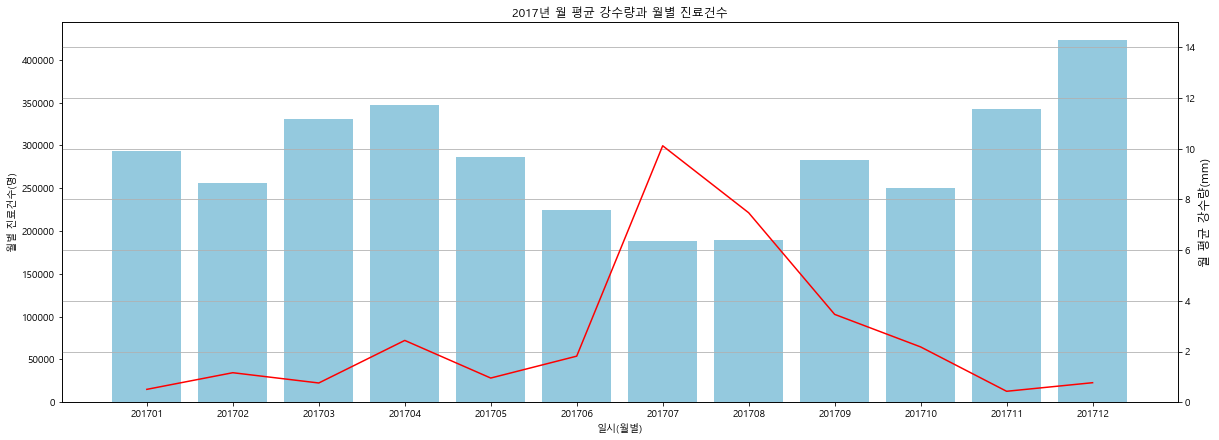

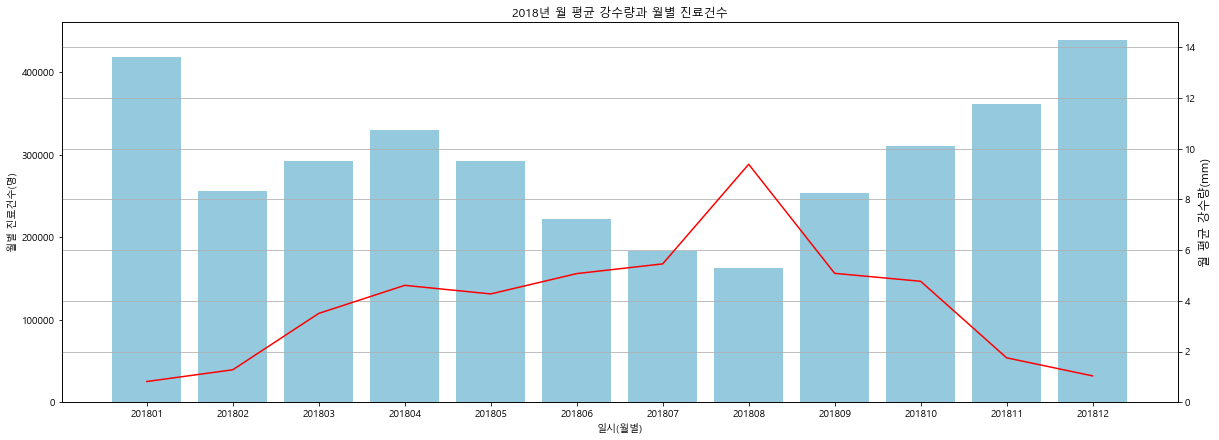

In [37]:
for i in [2016,2017,2018]:
    
    # 기상 데이터 로딩
    df_weather = pd.read_csv(f'../../lawdata/weather/기상관측{i}real_Fixed.csv', encoding = 'cp949')
    
    # 진료 데이터 로딩 (상세내용은 진료내역 전처리 참고)
    if i in [2016]:
        df_medi = pd.read_csv(f'../../lawdata/medical/NHIS_{i}_J_Cases.csv', encoding = 'cp949')
    else :
        df_medi = pd.read_csv(f'../../lawdata/medical/NHIS_{i}_J_Cases.csv', encoding = 'UTF-8')
        pass
    
    # 컬럼 타입 변환 후 일시 컬럼 재생성
    df_medi['요양개시일자'] =df_medi['요양개시일자'].astype('str')
    df_medi['일시(월별)'] = df_medi['요양개시일자'].apply(lambda x:x[:6])
    df_medi_count = df_medi.groupby('일시(월별)').count()['주상병코드']
    
    # 컬럼 타입 변환 후 일시 컬럼 재생성
    df_weather['일시'] =df_weather['일시'].astype('str')
    df_weather['일시(월별)'] = df_weather['일시'].apply(lambda x:x[:6])
    df_weather_mean = df_weather.groupby('일시(월별)')['일강수량(mm)'].mean()
    df_medi_count
    
    # 데이터 시각화
    f, ax = plt.subplots(figsize = (20, 7))
    
    # 진료 건수를 막대그래프로 그리기
    ax =sns.barplot(x = df_medi_count.index,
                     y = '주상병코드',
                    data = df_medi_count.to_frame(),
                   color = 'skyblue')
    
    ax2 = ax.twinx()
    
    # 강수량을 선그래프로 그리기
    ax2 = sns.lineplot(x = df_weather_mean.index,
                      y = '일강수량(mm)',
                      data = df_weather_mean.to_frame(),
                      color = 'red')

#     ax1.set_ylim(0, 50000)
    ax2.set_ylim(0, 15)
#     ax1.set_xlabel(f'{i}', size = 10)
    ax.set_ylabel('월별 진료건수(명)', size = 10)
    ax2.set_ylabel('월 평균 강수량(mm)', size = 10)
    plt.grid(True)
#     plt.axis([1950, 2010, 30, 90])
    plt.title(f'{i}년 월 평균 강수량과 월별 진료건수')
    plt.ylabel('월 평균 강수량(mm)', fontsize=12)
    
    # 사진 파일 저장
    plt.savefig(f'{i}년 월 평균 강수량과 월별 진료건수', dpi = 700)
    plt.show()
    pass

## 3. 연도별 미세먼지, 초미세먼지와 호흡기질환 발생 관계 시각화

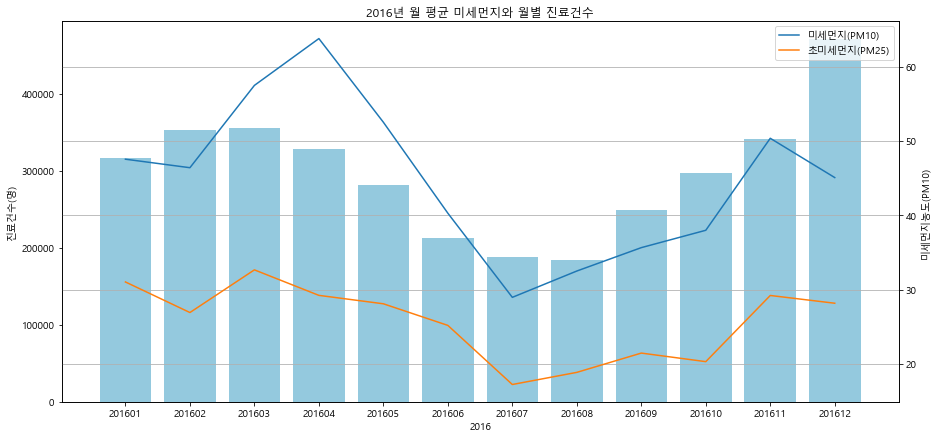

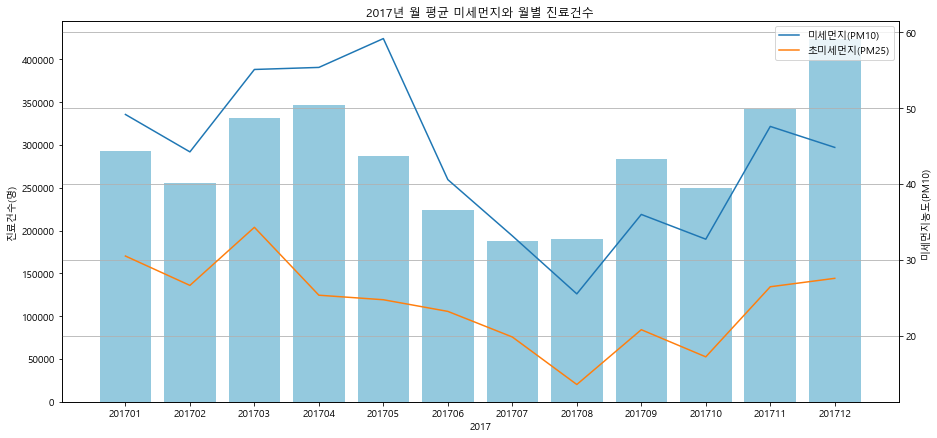

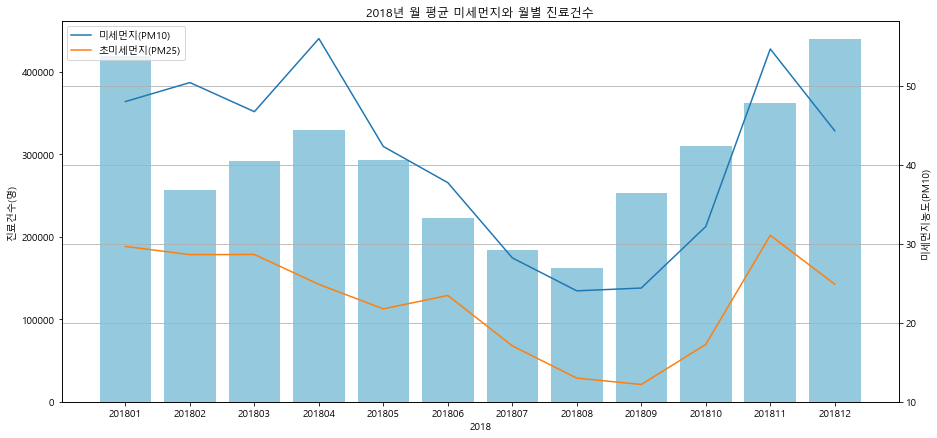

In [41]:
for i in [2016,2017,2018]:
    
    # 미세먼지 데이터 로딩 (상세내용은 미세먼지 전처리 참고)
    df_dust = pd.read_csv('../../refinedata/weather/fine_dust_data.csv', encoding = 'cp949')
    
    # 진료 데이터 로딩 (상세내용은 진료내역 전처리 참고)
    if i in [2016]:
        df_medi = pd.read_csv(f'../../lawdata/medical/NHIS_{i}_J_Cases.csv', encoding = 'cp949')
    else :
        df_medi = pd.read_csv(f'../../lawdata/medical/NHIS_{i}_J_Cases.csv', encoding = 'UTF-8')
        pass
    
    # 컬럼 타입 변환 후 일시 컬럼 재생성
    df_medi['요양개시일자']=df_medi['요양개시일자'].astype('str')
    df_dust['일시']=df_dust['일시'].astype('str')
    
    # 컬럼 타입 변환 후 일시 컬럼 재생성
    df_dust['일시(월별)'] = df_dust['일시'].apply(lambda x:x[:6])
    df_medi['일시(월별)'] = df_medi['요양개시일자'].apply(lambda x:x[:6])
    df_dust = df_dust[df_dust['일시'].str.startswith(f'{i}')]
    df_medi_count = df_medi.groupby('일시(월별)').count()['주상병코드']
    df_medi_count
    df_dust_mean = df_dust.groupby('일시(월별)').mean()
    
    # 데이터 시각화
    f, ax = plt.subplots(figsize = (15, 7))
    
    # 진료 건수를 막대그래프로 그리기
    ax =sns.barplot(x = df_medi_count.index,
                     y = '주상병코드',
                    data = df_medi_count.to_frame(),
                   color = 'skyblue')
    ax2 = ax.twinx()
    
    # 미세먼지와 초미세먼지 농도를 선그래프로 그리기
    ax2 =sns.lineplot(x = df_dust_mean.index,
                      y = 'PM10', 
                     label = '미세먼지(PM10)',
                     data = df_dust_mean)
    sns.lineplot(x = df_dust_mean.index,
                 y = 'PM25', 
                 label = '초미세먼지(PM25)',
                 data = df_dust_mean)
    
    ax.set_xlabel(f'{i}', size = 10)
    ax.set_ylabel('진료건수(명)', size = 10)
    ax2.set_ylabel('미세먼지농도(PM10)', size = 10)
    plt.grid(True)
    plt.title(f'{i}년 월 평균 미세먼지와 월별 진료건수')
    
    # 사진 파일 저장
    plt.savefig(f'{i}년 월 평균 미세먼지와 월별 진료건수', dpi = 700)
    plt.show()
    pass